In [1]:
from src.environment._ENV_capture import Board
from src.agent._AGENT_capture import Agent
from src.learn._q_learning_capture import Q_learning
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Capture chess
### Q-learning

In [20]:
board = Board()
agent = Agent(network='linear',gamma=0.5,lr=0.07)
R = Q_learning(agent,board)

100%|██████████| 600/600 [2:11:40<00:00, 13.17s/it]  


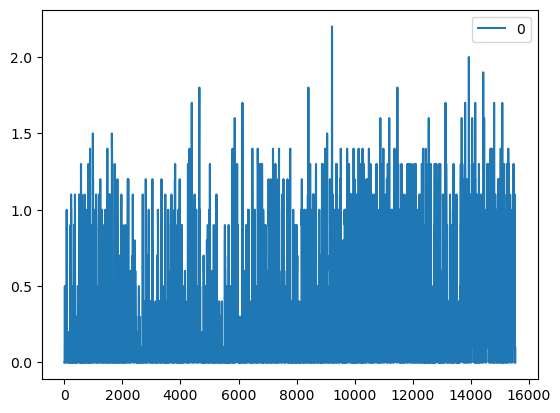

In [21]:
game = R.learn(600)

In [22]:
new_pgn = open("game.pgn", "w", encoding="utf-8")

<Axes: title={'center': 'average performance over the last 125 steps'}>

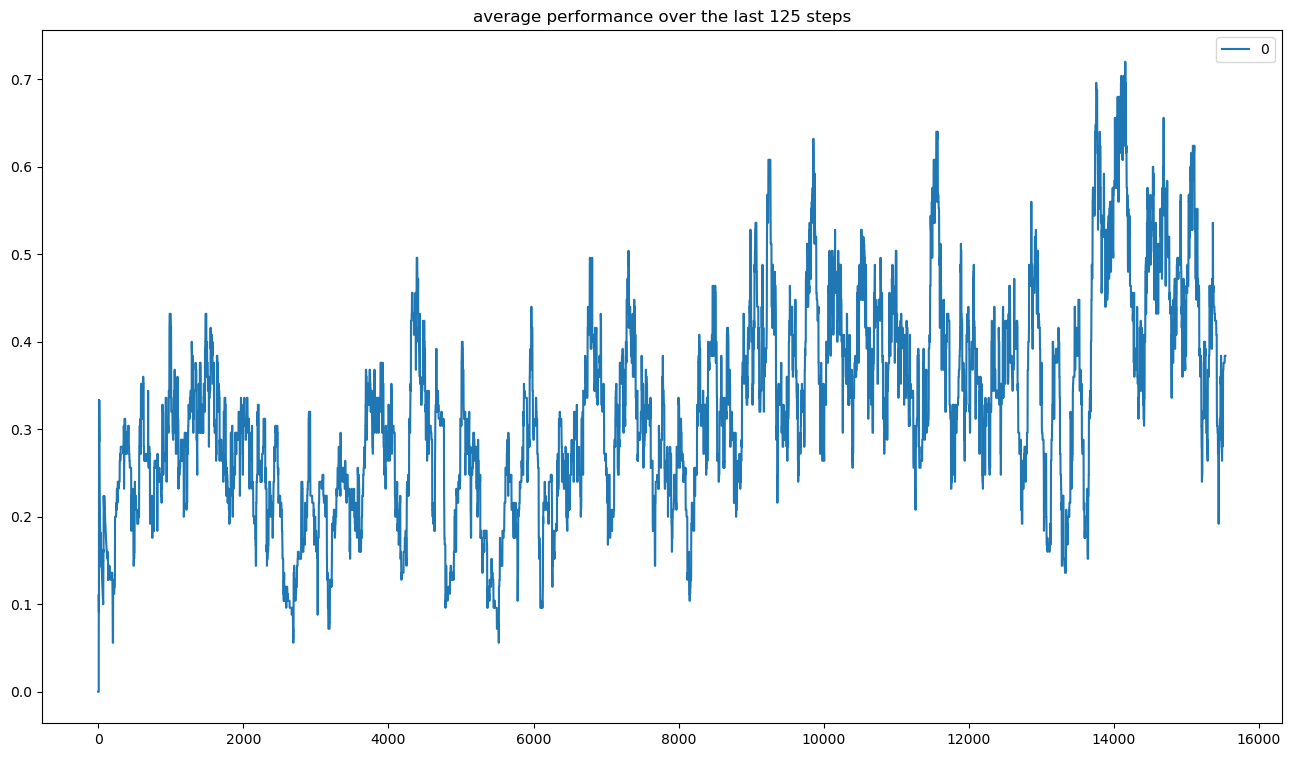

In [23]:
import pandas as pd
reward_smooth = pd.DataFrame(R.reward_trace)
reward_smooth.rolling(window=125,min_periods=0).mean().plot(figsize=(16,9),title='average performance over the last 125 steps')

In [24]:
print(game)

[Event "?"]
[Site "?"]
[Date "????.??.??"]
[Round "?"]
[White "?"]
[Black "?"]
[Result "*"]

1. d3 c5 2. Kd2 Nh6 3. d4 Ng8 4. Kd3 f5 5. Nh3 Kf7 6. Ng5+ Ke8 7. Nf7 Qc7 8. Nd8 Qb6 9. Rg1 Qh6 10. Na3 d5 11. Nb5 Qh5 12. Qe1 Qg5 13. Qd2 Qh6 14. g4 Qg6 15. gxf5 e6 16. Rg3 Kd7 17. Nd6 Qh5 18. e3 exf5 19. Be2 Nh6 20. Bf3 Qh3 21. b3 Qxh2 22. Bb2 b5 23. Ba3 Kxd8 24. Bb4 c4+ 25. Kc3 a6 26. Qd3 Nd7 *


In [25]:
board.reset()
bl = board.layer_board
bl[6,:,:] = 1/10  # Assume we are in move 10
av = R.agent.get_action_values(np.expand_dims(bl,axis=0))

av = av.reshape((64,64))

p = board.board.piece_at(20)#.symbol()


white_pieces = ['P','N','B','R','Q','K']
black_piece = ['_','p','n','b','r','q','k']

df = pd.DataFrame(np.zeros((6,7)))

df.index = white_pieces
df.columns = black_piece

for from_square in range(16):
    for to_square in range(30,64):
        from_piece = board.board.piece_at(from_square).symbol()
        to_piece = board.board.piece_at(to_square)
        if to_piece:
            to_piece = to_piece.symbol()
        else:
            to_piece = '_'
        df.loc[from_piece,to_piece] = av[from_square,to_square]


1/1 [==============================] - 0s 36ms/step


In [26]:
df[['_','p','n','b','r','q']]

,_,p,n,b,r,q
P,-0.138005,0.009170,-0.128682,-0.041218,0.166612,0.148783
N,0.082021,-0.143028,0.111397,-0.083274,-0.050976,-0.129480
B,0.067200,0.157948,-0.028355,0.157989,-0.045263,0.044882
R,-0.149413,0.175814,-0.099986,0.064385,-0.102314,0.226317
Q,0.012281,0.109628,-0.021716,-0.114360,-0.096374,0.116229
K,0.144462,-0.216887,-0.028388,0.226566,0.069881,-0.088348


100%|██████████| 300/300 [1:03:39<00:00, 12.73s/it]


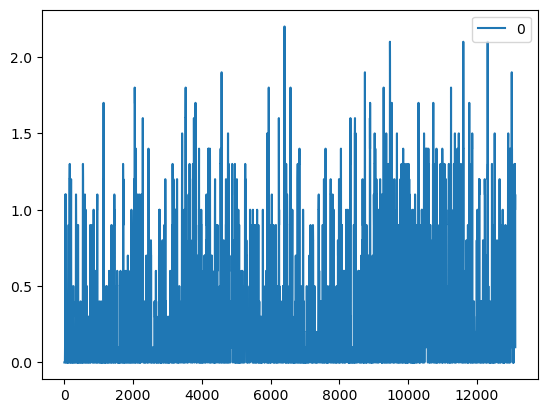

In [14]:
game2 = R.learn(300)

In [15]:
new_pgn = open("game2.pgn", "w", encoding="utf-8")


<Axes: title={'center': 'average performance over the last 125 steps'}>

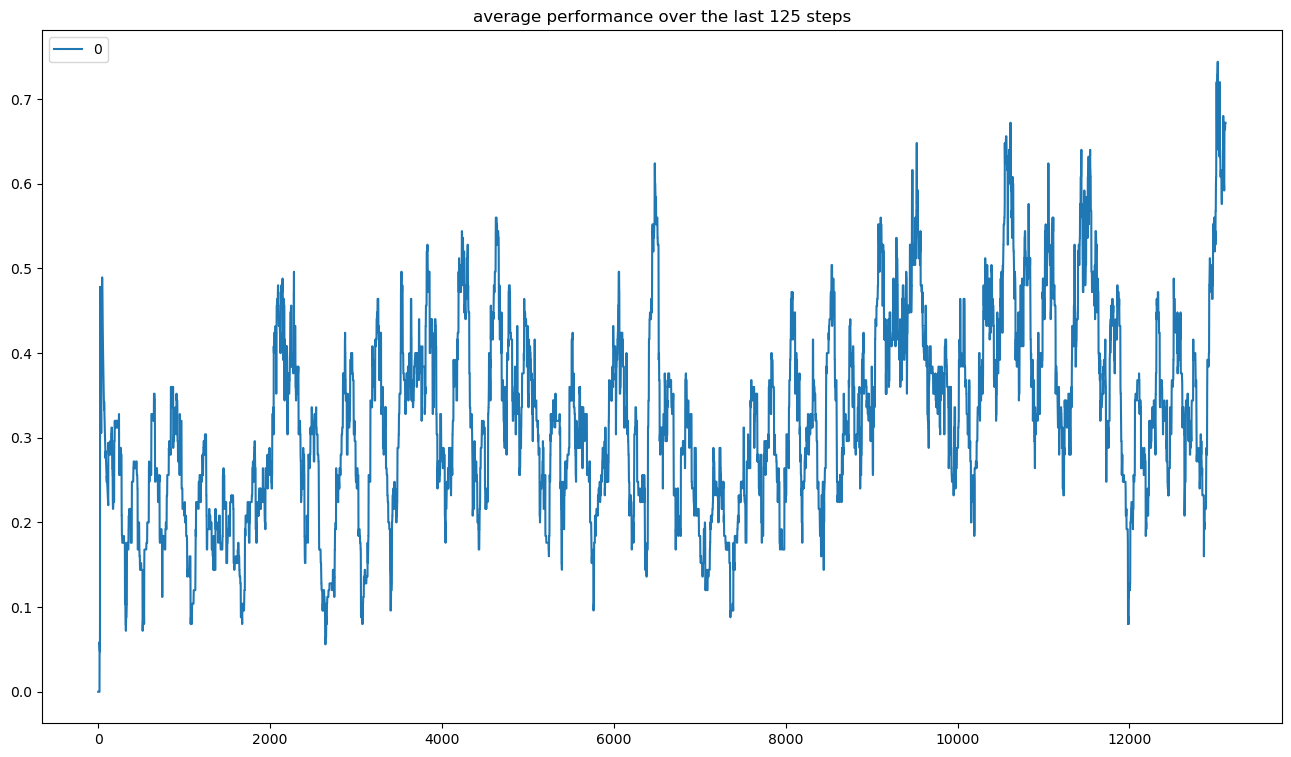

In [16]:
import pandas as pd
reward_smooth = pd.DataFrame(R.reward_trace)
reward_smooth.rolling(window=125,min_periods=0).mean().plot(figsize=(16,9),title='average performance over the last 125 steps')

In [17]:
print(game2)

[Event "?"]
[Site "?"]
[Date "????.??.??"]
[Round "?"]
[White "?"]
[Black "?"]
[Result "*"]

1. Nh3 g6 2. Rg1 b5 3. Nc3 b4 4. Nd5 h6 5. Nb6 e5 6. Nxc8 Rh7 7. Rb1 Rg7 8. d3 Qh4 9. Kd2 Qe4 10. e3 Qd4 11. Be2 Be7 12. Re1 Qc3+ 13. bxc3 bxc3+ 14. Kxc3 Bd8 15. Kb4 Nc6+ 16. Kc5 Nb8 17. Bd2 f5 18. Bf3 Nf6 19. Re2 d5 20. Ba5 e4 21. Bg4 Kf7 22. Bxf5 Ng8 23. Qd2 c6 24. Kd6 Bb6 25. Qc3 a6 26. Qb4 Bd8 *
